In [1]:
import pandas as pd
from sklearn.utils import shuffle as reset
def train_test_split(data, test_size=0.2, shuffle=True, random_state=42):
    '''Split DataFrame into random train and test subsets
    
    Parameters
    ----------
    data : pandas dataframe, need to split dataset.
    
    test_size : float
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split.
        
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
        
    shuffle : boolean, optional (default=None)
        Whether or not to shuffle the data before splitting. If shuffle=False
        then stratify must be None.
    '''

    if shuffle:
        data = reset(data, random_state=random_state)

    train = data[int(len(data)*test_size):].reset_index(drop = True)
    test  = data[:int(len(data)*test_size)].reset_index(drop = True)
    
    return train, test

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
train_data,test_data = train_test_split(data)
train_data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
test_data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

print(train_data.head())
print(test_data.head())

   sepal length  sepal width  petal length  petal width            class
0           4.6          3.6           1.0          0.2      Iris-setosa
1           5.7          4.4           1.5          0.4      Iris-setosa
2           6.7          3.1           4.4          1.4  Iris-versicolor
3           4.8          3.4           1.6          0.2      Iris-setosa
4           4.4          3.2           1.3          0.2      Iris-setosa
   sepal length  sepal width  petal length  petal width            class
0           6.1          2.8           4.7          1.2  Iris-versicolor
1           5.7          3.8           1.7          0.3      Iris-setosa
2           7.7          2.6           6.9          2.3   Iris-virginica
3           6.0          2.9           4.5          1.5  Iris-versicolor
4           6.8          2.8           4.8          1.4  Iris-versicolor


In [2]:
from sklearn import tree
import numpy as np
Y = train_data['class']
# 从data中去掉Name和Class作为输入特征X
X = train_data.drop(['class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=50)
clf = clf.fit(X, Y)
print(list(np.unique(Y)))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


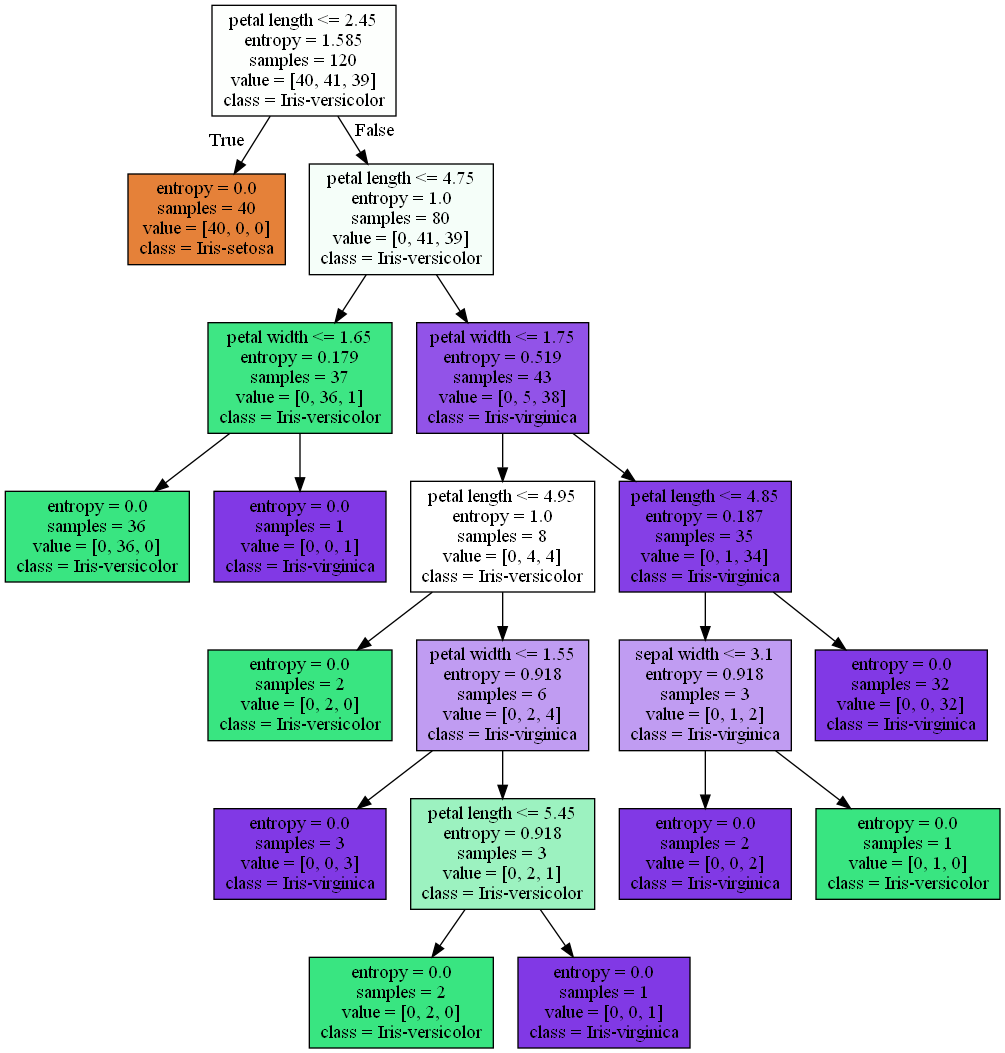

In [3]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=list(np.unique(Y)), filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [4]:
testY = test_data['class']
testX = test_data.drop(['class'],axis=1)

predY = clf.predict(testX)
predictions = pd.Series(predY,name='Predicted Class')

In [5]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00
